In this porject, our task is to predict price of the computer monitor based on the Amazon Monitor deals data from Kaggle. <br>
(https://www.kaggle.com/datasets/aruna1234/amazon-data-monitor-deals)
<br>
This task is done through following steps:<br>

1. Understanding the data

2. Data Cleaning

3. Feature Transformation/Engineering

4. Modeling for Prediction

We start the project by importing needed libraries

Import needed Libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso, Ridge, ElasticNet
import xgboost  as xgb
from scipy.stats import yeojohnson
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import re
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
import lightgbm
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor

In [2]:
# load data
df = pd.read_csv('/Users/wootaekkim/Desktop/youtube learning/monitor-deals.csv')
df.head()

,Standing screen display size,Screen Resolution,Max Screen Resolution,Brand,Item model number,Item Weight,Unit,Item Weight in Kg,Length(In),Width(In),...,Display Type,Warranty,Optical Drive Type,Scanner Resolution,Connectivity technologies,Domestic Shipping,International Shipping,Display Style,Usage,Warranty Description
0,24 Inches,1920 x 1080,1920X1080 Pixels,Sceptre,E248B-FPT168S,6.17,pounds,2.7765,21.21,15.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27 Inches,NaN,1920x1080 Pixels,Sceptre,E275B-FWD240,10.44,pounds,4.698,24.13,21.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24 Inches,1920x1080,1920 x 1080 Pixels,Sceptre,E248W-19203R,5.77,pounds,2.5965,21.59,7.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24 Inches,NaN,1920x1080 Pixels,Sceptre,E249W-FPT,6.02,pounds,2.709,21.25,15.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20 Inches,1600x900,1600 x 900 Pixels,Sceptre,E209W-16003RT,4.29,pounds,1.9305,18.01,7.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Standing screen display size,Screen Resolution,Max Screen Resolution,Brand,Item model number,Item Weight,Unit,Item Weight in Kg,Length(In),Width(In),...,Display Type,Warranty,Optical Drive Type,Scanner Resolution,Connectivity technologies,Domestic Shipping,International Shipping,Display Style,Usage,Warranty Description
2022,NaN,NaN,NaN,NaN,NaN,11.3,ounces,0.226,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN,6.4,ounces,0.128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,NaN,NaN,5.9,ounces,0.118,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025,NaN,NaN,NaN,NaN,IX156UC 4K,4.12,pounds,1.854,14.29,8.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026,NaN,NaN,NaN,NaN,IX156FC not touch,4.18,pounds,1.881,14.29,8.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 91 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Standing screen display size               692 non-null    object 
 1   Screen Resolution                          214 non-null    object 
 2   Max Screen Resolution                      582 non-null    object 
 3   Brand                                      842 non-null    object 
 4   Item model number                          1365 non-null   object 
 5   Item Weight                                2009 non-null   object 
 6   Unit                                       2008 non-null   object 
 7   Item Weight in Kg                          2027 non-null   object 
 8   Length(In)                                 1275 non-null   float64
 9   Width(In)                                  1275 non-null   float64
 10  Height(In)              

Visualize the missing ratios of variables with missing values

In [5]:
missing_ratio = []
have_null = []
for col in df.columns:
    if sum(df[col].isna())>0:
        have_null.append(col)
        missing_ratio.append(sum(df[col].isna())/len(df[col]))

In [6]:
df_null = pd.DataFrame({'column_name': have_null,
                       'missing_ratio' : missing_ratio})
df_null.sort_values(by = 'missing_ratio',ascending = False ,inplace = True)

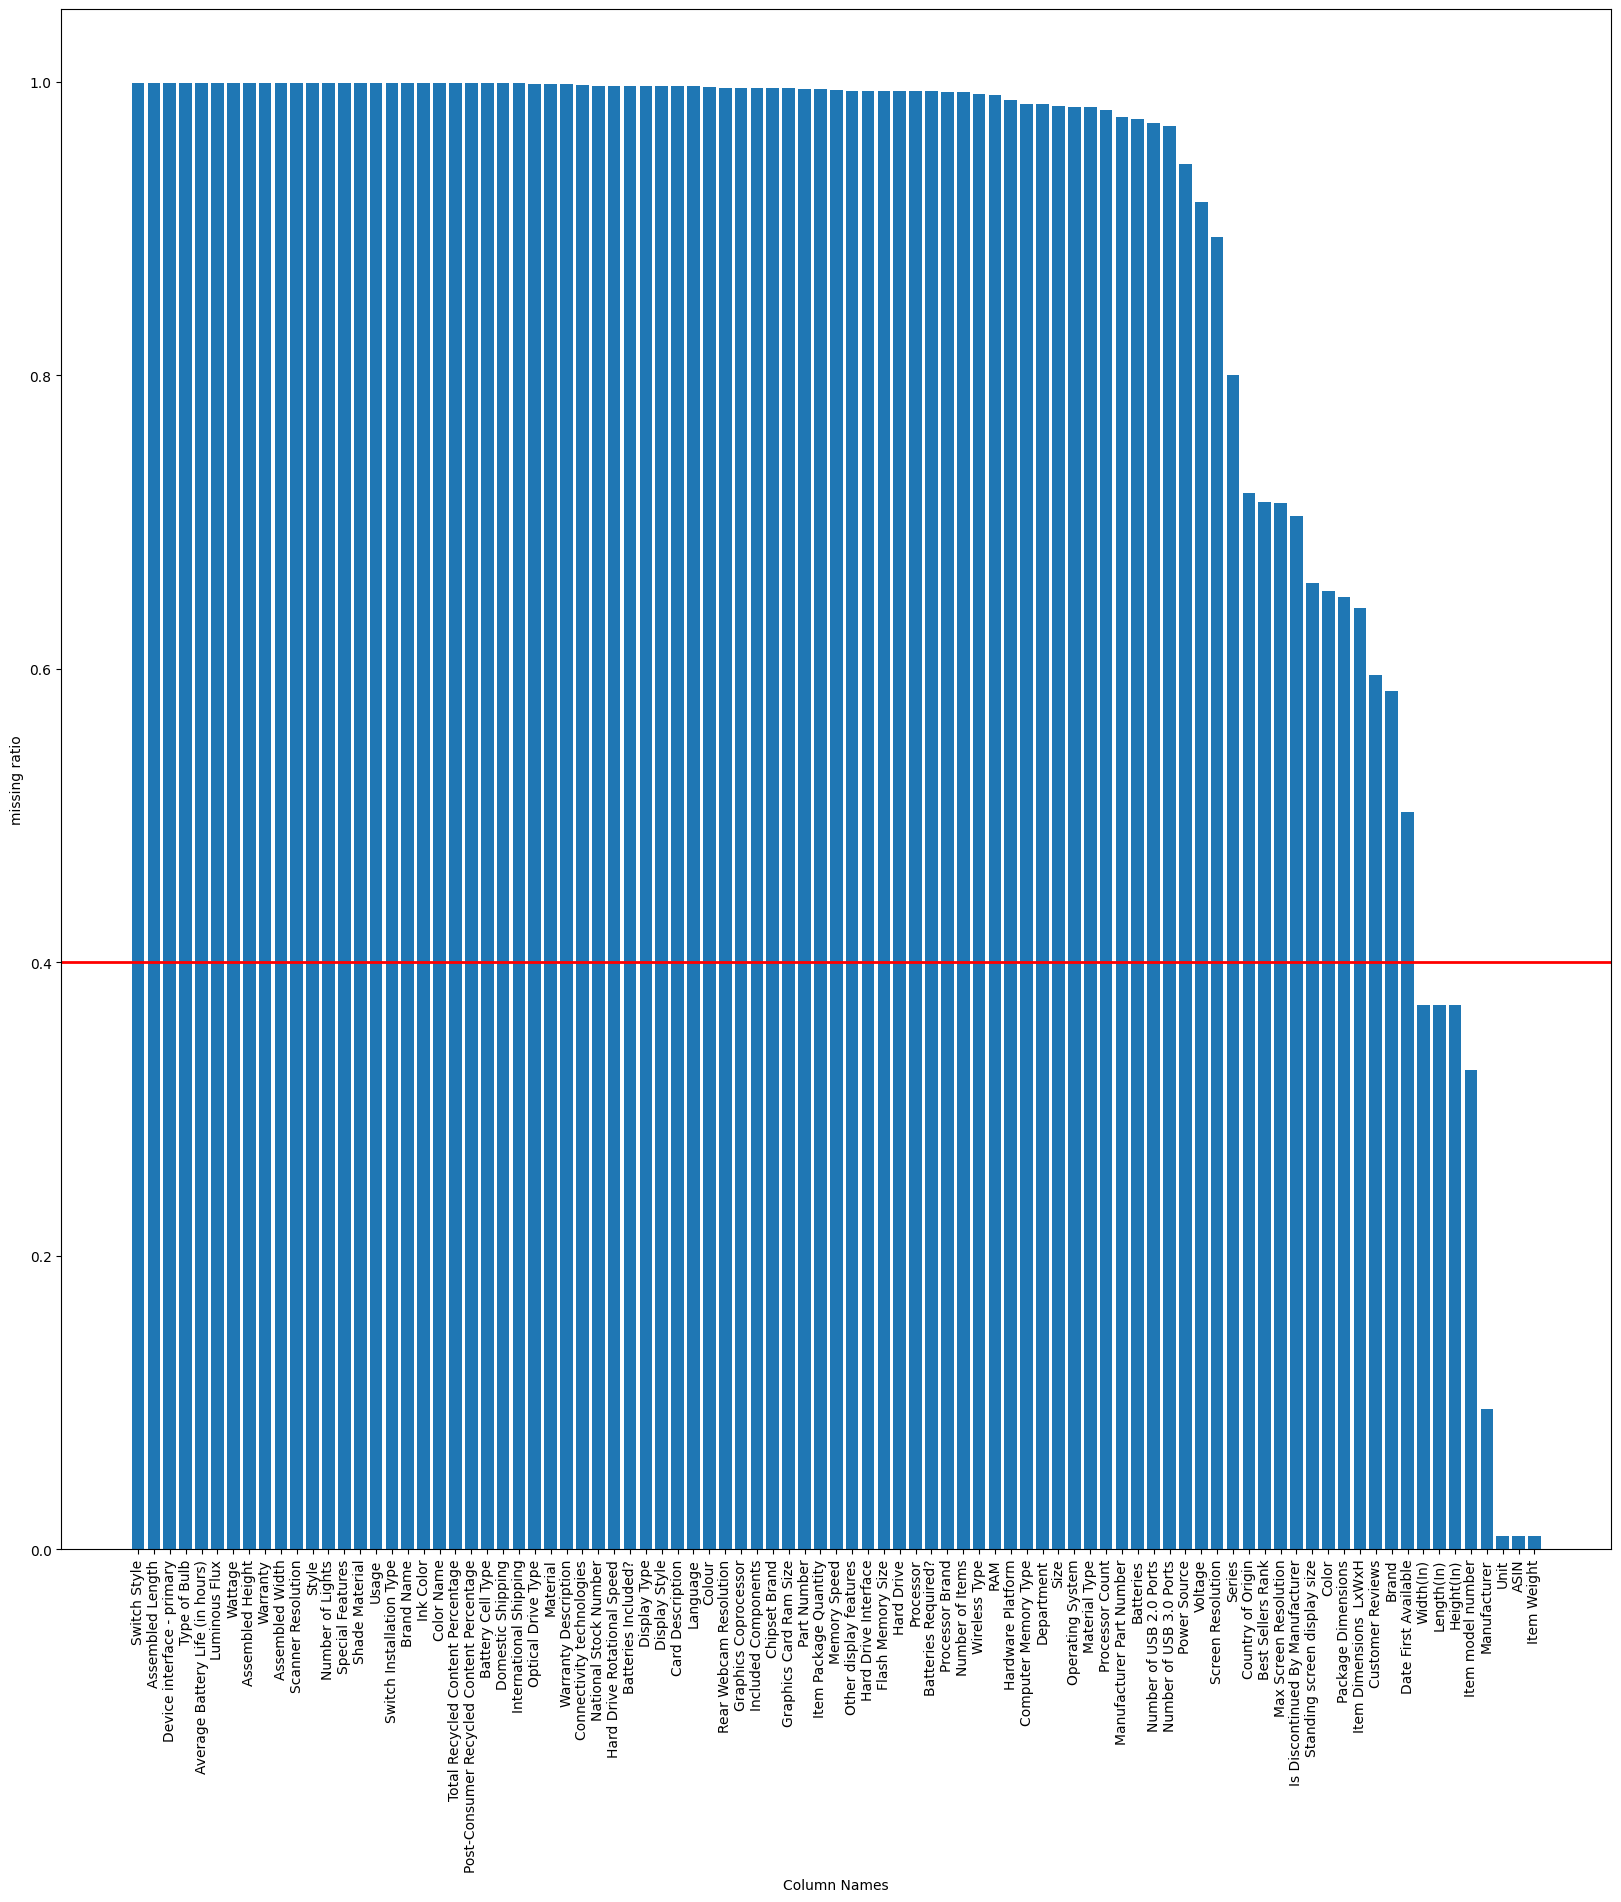

In [7]:
plt.figure(figsize =(20,20))
plt.bar(x = df_null['column_name'],height = df_null['missing_ratio'] )
plt.axhline(y = 0.4, linewidth=2, color='red')
plt.xticks(rotation = 90)
plt.xlabel('Column Names')
plt.ylabel('missing ratio')
plt.show()

Drop all the variables with missing value higher then 0.4

In [8]:
high_missing_ratio = list(df_null[df_null['missing_ratio'] > 0.4]['column_name'])
df.drop(high_missing_ratio, axis = 1, inplace = True)
df.shape

(2027, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item model number  1365 non-null   object 
 1   Item Weight        2009 non-null   object 
 2   Unit               2008 non-null   object 
 3   Item Weight in Kg  2027 non-null   object 
 4   Length(In)         1275 non-null   float64
 5   Width(In)          1275 non-null   float64
 6   Height(In)         1275 non-null   float64
 7   Manufacturer       1833 non-null   object 
 8   ASIN               2009 non-null   object 
 9   Price              2027 non-null   object 
dtypes: float64(3), object(7)
memory usage: 158.5+ KB


### Data Cleaning

First compare between Item Weight and Item weight in Kg. <br>
Use the one with lower missing ratio and drop the other.

In [10]:
print('missing ratio of Item Weight is: ', sum(df['Item Weight'].isna())/2027)
print(' ')
print('missing ratio of Item Weight in Kg is: ', sum(df['Item Weight in Kg'].isna())/2027)

missing ratio of Item Weight is:  0.008880118401578688
 
missing ratio of Item Weight in Kg is:  0.0


As missing ratio of 'Item Weight' is higher. So, use 'Item Weight in Kg' instead and drop 'Item Weight'

In [11]:
df.drop('Item Weight', axis = 1, inplace =True)

Also drop column 'Unit' as this is a column showing unit of weight of the item.

In [12]:
df.drop('Unit', axis = 1, inplace =True)

From above, we can see that data type of the 'Item Weight in Kg' is object. So, change it to float

In [13]:
df['Item Weight in Kg'].dtype

dtype('O')

In [14]:
# replace "#VALUE!" with zero and fill it with the mean of the total values
df['Item Weight in Kg'].replace("#VALUE!",0, inplace = True)
df['Item Weight in Kg'] = pd.to_numeric(df['Item Weight in Kg'])

In [15]:
df['Item Weight in Kg'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2027 entries, 0 to 2026
Series name: Item Weight in Kg
Non-Null Count  Dtype  
--------------  -----  
2027 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


Fill any values equal 0 with average in'Item Weight in Kg' column.

In [16]:
item_weight_kg_mean = df['Item Weight in Kg'][df['Item Weight in Kg'] !=0].mean()
df['Item Weight in Kg'].replace(0,item_weight_kg_mean, inplace = True)

Now we have delt with item weight, remove Item model number and ASIN since unecessary for the prediction of price

In [17]:
df.drop(['Item model number', 'ASIN'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Weight in Kg  2027 non-null   float64
 1   Length(In)         1275 non-null   float64
 2   Width(In)          1275 non-null   float64
 3   Height(In)         1275 non-null   float64
 4   Manufacturer       1833 non-null   object 
 5   Price              2027 non-null   object 
dtypes: float64(4), object(2)
memory usage: 95.1+ KB


In [18]:
len(df['Manufacturer'].str.upper().unique()) < len(df['Manufacturer'].unique())

True

Make "manufaturer" variable to all upper case to easily see any identical companies written in different ways to reduce the number of unique values of Manufacturer 

In [19]:
df['Manufacturer'] = df['Manufacturer'].str.upper()
df['Manufacturer'].fillna('NA', inplace = True)

In [20]:
df['Manufacturer'].unique()

array(['SCEPTRE', 'SCEPTRE INC.', 'HEWLETT PACKARD', 'PRECHEN', 'LG',
       'PHILIPS COMPUTER MONITORS', 'AE TRI-SCREEN DISPLAY', 'JSTT',
       'SAMSUNG', 'ASUS', 'E-SCEPTRE', 'HMDBY', 'ILOOKER', 'LANDZO', 'NA',
       '24-APR-16', 'CINOTOP ELECTRONICS CO., LTD', 'ACER', 'VIEWSONIC',
       'EVICIV', 'PLUGABLE', 'CYRRET', 'PLUGABLE TECHNOLOGIES',
       'AOC INTERNATIONAL', 'LENOVO', 'WALI', 'DELL COMPUTERS',
       'ASUS COMPUTER INTERNATIONAL DIRECT', 'GTEK ELECTRONICS CORP',
       'SOUNDANCE', 'CNTORICH', 'ITNRSIIET', 'UGREEN GROUP LIMITED',
       'HP_', 'DELL MARKETING USA, LP', 'ICLEVER', 'GIGABYTE',
       'VIEWSONIC CORPORATION', 'Z Z-EDGE', 'VISIONOWL', 'ALIENWARE',
       'ENVISION', 'COCOPAR',
       'SHENZHEN E-TECH DIGTIAL TECHNOLOGY CO., LTD.', 'BENQ',
       'DECO GEAR', 'HEWLETT-PACKARD OFFICE', 'MSI COMPUTER',
       'SAMSUNG BUSINESS', 'VIOTEK', 'THINLERAIN', 'OFIYAA', 'ARZOPA',
       'DELL TECHNOLOGIES', 'SHENZHENSHI SANGMU BANDAOTI CO., LTD', '24M',
       'PISI

In [21]:
len(df['Manufacturer'].unique())

391

In [22]:
for i in range(len(df)):
    if 'DELL' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'DELL'
    elif 'SAMSUNG' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'SAMSUNG'
    elif 'SCEPTRE' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'SCEPTRE'
    elif 'HP' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'HP'
    elif 'LG' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'LG'
    elif 'ASUS' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'ASUS'
    elif 'VIEWSONIC' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'VIEWSONIC'
    elif 'ACER' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'ACER'
    elif  df['Manufacturer'].iloc[i] in ['24-APR-16','#N/A!', '1-DEC-19','N140HCN-G53 OR COMPATIBLE']:
        df['Manufacturer'].iloc[i] = 'NA'
    elif 'SHENZHEN' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'SHENZHEN'   
    elif 'IOGEAR' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'IOGEAR'
    elif 'ELO TOUCH' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'ELO TOUCH'
    elif 'HEWLETT' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'HEWLETT'
    elif '3M' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = '3M'
    elif 'WAVESHARE' in df['Manufacturer'].iloc[i]:
        df['Manufacturer'].iloc[i] = 'WAVESHARE'


/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2830500081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'].iloc[i] = 'SCEPTRE'
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2830500081.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'].iloc[i] = 'HEWLETT'
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2830500081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [23]:
len(df['Manufacturer'].unique())

360

Make dataframe showing count of each manufacturers

In [24]:
num_item = []
for m in df['Manufacturer'].unique():
    num_item.append(len(df['Manufacturer'][df['Manufacturer'] == m]))

num_itme_manufac = pd.DataFrame({'Manufacturer': list(df['Manufacturer'].unique()),
                                'num_items': num_item})
num_itme_manufac.sort_values('num_items', ascending = False, inplace = True)


In [25]:
num_itme_manufac.reset_index(drop = True, inplace = True)

In [26]:
num_itme_manufac[num_itme_manufac['num_items']> 15]

,Manufacturer,num_items
0,NA,201
1,ACER,106
2,EBESTPANEL,104
3,LG,72
4,ASUS,68
5,SCEPTRE,66
6,WAVESHARE,54
7,ORIGINAL,51
8,VSDISPLAY,51
9,DELL,51


Classify as other for manufaturer less than 15 and NA

In [27]:
other = list(num_itme_manufac[num_itme_manufac['num_items']< 15]['Manufacturer'])

In [28]:
for i in range(len(df)):
    if df['Manufacturer'].iloc[i] in other:
        df['Manufacturer'].iloc[i] = 'other'

/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/638458192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'].iloc[i] = 'other'


In [29]:
len(df['Manufacturer'].unique())

27

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Weight in Kg  2027 non-null   float64
 1   Length(In)         1275 non-null   float64
 2   Width(In)          1275 non-null   float64
 3   Height(In)         1275 non-null   float64
 4   Manufacturer       2027 non-null   object 
 5   Price              2027 non-null   object 
dtypes: float64(4), object(2)
memory usage: 95.1+ KB


Now change price, our target variable to float

In [31]:
df['Price'].iloc[0]

'$219.97 '

In [32]:
# first extract only number from each samples
df['Price'] = df['Price'].apply(lambda x: re.findall("([0-9]{1,5}\.[0-9]{2})",x)[0])
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].iloc[0]

219.97

In [33]:
df.columns

Index(['Item Weight in Kg', 'Length(In)', 'Width(In)', 'Height(In)',
       'Manufacturer', 'Price'],
      dtype='object')

Make a dataframe showing average price of monitor based on manufactueres

In [34]:
df_p_mf = df.groupby('Manufacturer').mean()['Price']
df_p_mf = pd.DataFrame(df_p_mf)
df_p_mf.reset_index(inplace = True)
df_p_mf

,Manufacturer,Price
0,ACER,316.828774
1,AOC INTERNATIONAL,256.616875
2,ASUS,314.661618
3,BICOOL,33.097500
4,"CINOTOP ELECTRONICS CO., LTD",273.997368
5,DELL,372.222353
6,EBESTPANEL,171.284615
7,GENERIC,78.017059
8,HP,265.025200
9,ILOOKER,74.566667


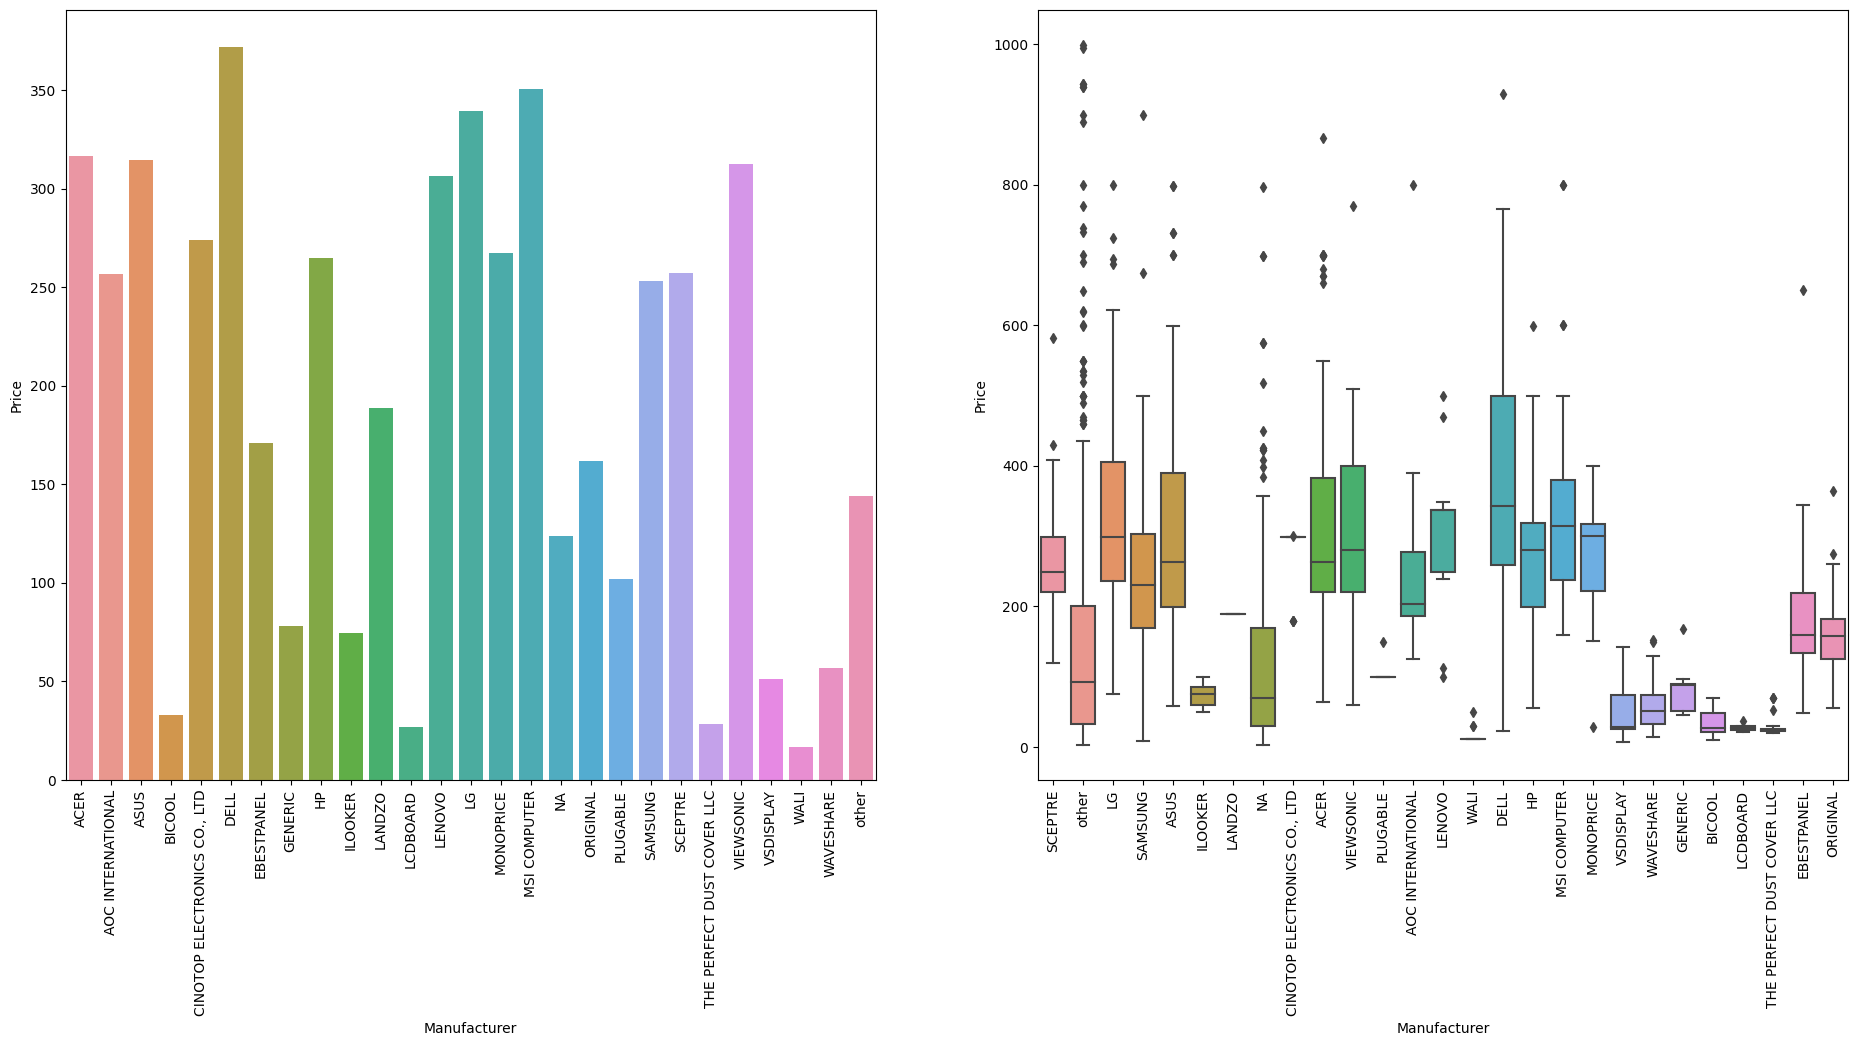

In [35]:
fig = plt.figure(figsize = (23,10))
fig1 = fig.add_subplot(121) ; sns.barplot(data =df_p_mf, x = 'Manufacturer', y = 'Price')
plt.xticks(rotation = 90)
fig2 = fig.add_subplot(122) ; sns.boxplot(data = df, x = 'Manufacturer', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

In [36]:
df_p_mf.sort_values(by = 'Price', inplace = True)
df_p_mf.reset_index(drop = True, inplace = True)
df_p_mf

,Manufacturer,Price
0,WALI,16.615000
1,LCDBOARD,26.923684
2,THE PERFECT DUST COVER LLC,28.378889
3,BICOOL,33.097500
4,VSDISPLAY,51.291569
5,WAVESHARE,56.671481
6,ILOOKER,74.566667
7,GENERIC,78.017059
8,PLUGABLE,102.125000
9,NA,123.674229


Here we do the label encoding based on the average price of monitors. We use lable encoding because label encoding works well with tree based models, and this is a way to transform categorial variable into numerical variable withour increasing number of features which can possibly make the model's prediction performace worse

In [37]:
label = np.linspace(1, len(df_p_mf)*2-1,len(df_p_mf) )
manufacturer_list = list(df_p_mf['Manufacturer'])
for i in range(len(df)):
    i_label = label[manufacturer_list.index(df['Manufacturer'].iloc[i])]
    df['Manufacturer'].iloc[i] = i_label   

/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/1283033396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Manufacturer'].iloc[i] = i_label


In [38]:
df['Manufacturer'].unique()

array([33.0, 21.0, 49.0, 29.0, 45.0, 13.0, 27.0, 19.0, 39.0, 47.0, 43.0,
       17.0, 31.0, 41.0, 1.0, 53.0, 35.0, 51.0, 37.0, 9.0, 11.0, 15.0,
       7.0, 3.0, 5.0, 25.0, 23.0], dtype=object)

In [39]:
df['Manufacturer'] = pd.to_numeric(df['Manufacturer'])
df['Manufacturer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2027 entries, 0 to 2026
Series name: Manufacturer
Non-Null Count  Dtype  
--------------  -----  
2027 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


Now make a dataframe showing average length, width, and height of monitors of each manufacturer to fill in missing data of length, width, and height.

In [40]:
df_lwh_mf = df.groupby('Manufacturer').mean()[['Length(In)', 'Width(In)', 'Height(In)']]
df_lwh_mf

,Length(In),Width(In),Height(In)
Manufacturer,,,
1.0,10.550000,10.300000,10.690000
3.0,4.920000,2.280000,0.670000
5.0,16.276944,20.640556,11.712222
7.0,NaN,NaN,NaN
9.0,63.183333,21.466667,5.713333
11.0,5.383333,3.151667,2.098333
13.0,23.720909,2.830000,7.111818
15.0,14.790000,4.949167,1.886667
17.0,3.419375,8.639375,1.028750


From above we can assume that missing values are in category 7, 23, 25, 27. Get the mean values of Length, Height, and Width and fill in the NaN values

In [41]:
print('Average Price of Monitor from maufacturer 27 : ',np.mean(df[df['Manufacturer'] == 27.0]['Price']))
print(' ')
print('Average Price of Monitor from maufacturer 23 : ', np.mean(df[df['Manufacturer'] == 23.0]['Price']))
print(' ')
print('Average Price of Monitor from maufacturer 25 : ', np.mean(df[df['Manufacturer'] == 25.0]['Price']))
print(' ')
print('Average Price of Monitor from maufacturer 7 : ', np.mean(df[df['Manufacturer'] == 7.0]['Price']))

Average Price of Monitor from maufacturer 27 :  188.99
 
Average Price of Monitor from maufacturer 23 :  162.0392156862745
 
Average Price of Monitor from maufacturer 25 :  171.28461538461536
 
Average Price of Monitor from maufacturer 7 :  33.0975


get the values of length, width, and height with price within range of average of price in each category.

In [43]:
lwh_27 = list(np.mean(df[(185 < df['Price'])& (df['Price']<190)][['Length(In)', 'Width(In)', 'Height(In)']]))
lwh_7 =  list(np.mean(df[(31 < df['Price'])& (df['Price']<36)][['Length(In)', 'Width(In)', 'Height(In)']]))
lwh_23 =  list(np.mean(df[(160 < df['Price'])& (df['Price']<165)][['Length(In)', 'Width(In)', 'Height(In)']]))
lwh_25 =  list(np.mean(df[(168 < df['Price'])& (df['Price']<173)][['Length(In)', 'Width(In)', 'Height(In)']]))

/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype,

In [44]:
print('mean of Length each category of Manufacturer: ')
print('7 : ', lwh_7[0], ', 23 : ',lwh_23[0])
print('25 : ',lwh_25[0], ', 27 : ', lwh_27[0] )
print(' ')
print('mean of Width each category of Manufacturer: ')
print('7 : ', lwh_7[1], ', 23 : ',lwh_23[1])
print('25 : ',lwh_25[1], ', 27 : ', lwh_27[1] )
print(' ')
print('mean of Height each category of Manufacturer: ')
print('7 : ', lwh_7[2], ', 23 : ',lwh_23[2])
print('25 : ',lwh_25[2], ', 27 : ', lwh_27[2] )

mean of Length each category of Manufacturer: 
7 :  54.51054054054054 , 23 :  15.784000000000002
25 :  12.651739130434782 , 27 :  17.313478260869566
 
mean of Width each category of Manufacturer: 
7 :  19.131351351351352 , 23 :  11.063999999999998
25 :  9.701304347826087 , 27 :  11.18913043478261
 
mean of Height each category of Manufacturer: 
7 :  8.247027027027027 , 23 :  2.5799999999999996
25 :  6.457391304347826 , 27 :  10.67478260869565


Fill in length, height, and width in category 27, 25, 23, 7 using average computed above

In [45]:
['Length(In)', 'Width(In)', 'Height(In)']
for i in range(len(df)):
    if df['Manufacturer'].iloc[i] == 7.0:
        df['Length(In)'].iloc[i] = lwh_7[0]
        df['Width(In)'].iloc[i] = lwh_7[1]
        df['Height(In)'].iloc[i] = lwh_7[2]
    elif df['Manufacturer'].iloc[i] == 23.0:
        df['Length(In)'].iloc[i] = lwh_23[0]
        df['Width(In)'].iloc[i] = lwh_23[1]
        df['Height(In)'].iloc[i] = lwh_23[2]
    elif df['Manufacturer'].iloc[i] == 25.0:
        df['Length(In)'].iloc[i] = lwh_25[0]
        df['Width(In)'].iloc[i] = lwh_25[1]
        df['Height(In)'].iloc[i] = lwh_25[2]
    elif df['Manufacturer'].iloc[i] == 27.0:
        df['Length(In)'].iloc[i] = lwh_27[0]
        df['Width(In)'].iloc[i] = lwh_27[1]
        df['Height(In)'].iloc[i] = lwh_27[2]
        

After filling some of the missing values, check if there are any other missing data in the our dataframe

In [46]:
df[df.isna().any(axis=1)]

,Item Weight in Kg,Length(In),Width(In),Height(In),Manufacturer,Price
10,5.701500,NaN,NaN,NaN,21.0,219.99
60,0.495000,NaN,NaN,NaN,13.0,54.90
66,2.916000,NaN,NaN,NaN,31.0,207.99
68,0.900000,NaN,NaN,NaN,1.0,11.99
70,2.916000,NaN,NaN,NaN,31.0,207.99
...,...,...,...,...,...,...
1994,0.286000,NaN,NaN,NaN,21.0,69.99
1999,2.486468,NaN,NaN,NaN,19.0,19.99
2003,2.486468,NaN,NaN,NaN,19.0,21.00
2009,0.076800,NaN,NaN,NaN,21.0,30.88


In [47]:
df[df.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 10 to 2024
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Weight in Kg  564 non-null    float64
 1   Length(In)         0 non-null      float64
 2   Width(In)          0 non-null      float64
 3   Height(In)         0 non-null      float64
 4   Manufacturer       564 non-null    float64
 5   Price              564 non-null    float64
dtypes: float64(6)
memory usage: 30.8 KB


Fill in the null values of length, width, height with average of the values from same Manufacturer and within the similar price range(+/- 20)

In [48]:
for i in range(len(df)):
    if np.isnan(df['Length(In)'].iloc[i]):
        mf = df['Manufacturer'].iloc[i]
        df['Length(In)'].iloc[i] = np.mean(df[(df['Manufacturer'] == mf)&(df['Price']>df['Price'].iloc[i]-20)&
                                              (df['Price']<df['Price'].iloc[i]+20)]['Length(In)'])
        df['Width(In)'].iloc[i] = np.mean(df[(df['Manufacturer'] == mf)&(df['Price']>df['Price'].iloc[i]-20)&
                                              (df['Price']<df['Price'].iloc[i]+20)]['Width(In)'])
        df['Height(In)'].iloc[i] = np.mean(df[(df['Manufacturer'] == mf)&(df['Price']>df['Price'].iloc[i]-20)&
                                              (df['Price']<df['Price'].iloc[i]+20)]['Height(In)'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Weight in Kg  2027 non-null   float64
 1   Length(In)         1996 non-null   float64
 2   Width(In)          1996 non-null   float64
 3   Height(In)         1996 non-null   float64
 4   Manufacturer       2027 non-null   float64
 5   Price              2027 non-null   float64
dtypes: float64(6)
memory usage: 95.1 KB


In [50]:
df[df.isna().any(axis=1)]

,Item Weight in Kg,Length(In),Width(In),Height(In),Manufacturer,Price
556,2.486468,NaN,NaN,NaN,19.0,575.00
574,8.811000,NaN,NaN,NaN,31.0,799.99
606,9.765000,NaN,NaN,NaN,41.0,469.00
625,2.486468,NaN,NaN,NaN,19.0,575.00
732,2.486468,NaN,NaN,NaN,19.0,797.00
780,11.610000,NaN,NaN,NaN,49.0,724.11
786,6.736500,NaN,NaN,NaN,37.0,199.99
817,8.217000,NaN,NaN,NaN,31.0,299.99
836,13.050000,NaN,NaN,NaN,19.0,699.00
912,13.050000,NaN,NaN,NaN,19.0,699.00


Now fill in the remaining null values with average length, width, and height from same Manufacturer.

In [51]:
for i in range(len(df)):
    if np.isnan(df['Length(In)'].iloc[i]):
        mf = df['Manufacturer'].iloc[i]
        df['Length(In)'].iloc[i] = np.mean(df[df['Manufacturer'] == mf]['Length(In)'])
        df['Width(In)'].iloc[i] = np.mean(df[df['Manufacturer'] == mf]['Width(In)'])
        df['Height(In)'].iloc[i] = np.mean(df[df['Manufacturer'] == mf]['Height(In)'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Weight in Kg  2027 non-null   float64
 1   Length(In)         2027 non-null   float64
 2   Width(In)          2027 non-null   float64
 3   Height(In)         2027 non-null   float64
 4   Manufacturer       2027 non-null   float64
 5   Price              2027 non-null   float64
dtypes: float64(6)
memory usage: 95.1 KB


In [53]:
df.describe()

,Item Weight in Kg,Length(In),Width(In),Height(In),Manufacturer,Price
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,2.486468,16.333750,10.288908,7.598544,25.856438,179.346344
std,3.186617,15.469113,7.341901,6.956286,12.223834,163.114580
min,0.000080,0.010000,0.010000,0.010000,1.000000,2.950000
25%,0.174000,8.660000,6.300000,2.000000,21.000000,49.925000
50%,0.810000,14.020000,9.167676,5.510000,21.000000,148.000000
75%,4.455000,21.265000,11.189130,10.674783,33.000000,258.490000
max,27.000000,172.440000,62.000000,53.340000,53.000000,999.000000


### Understanding Relationship between variables

<AxesSubplot: >

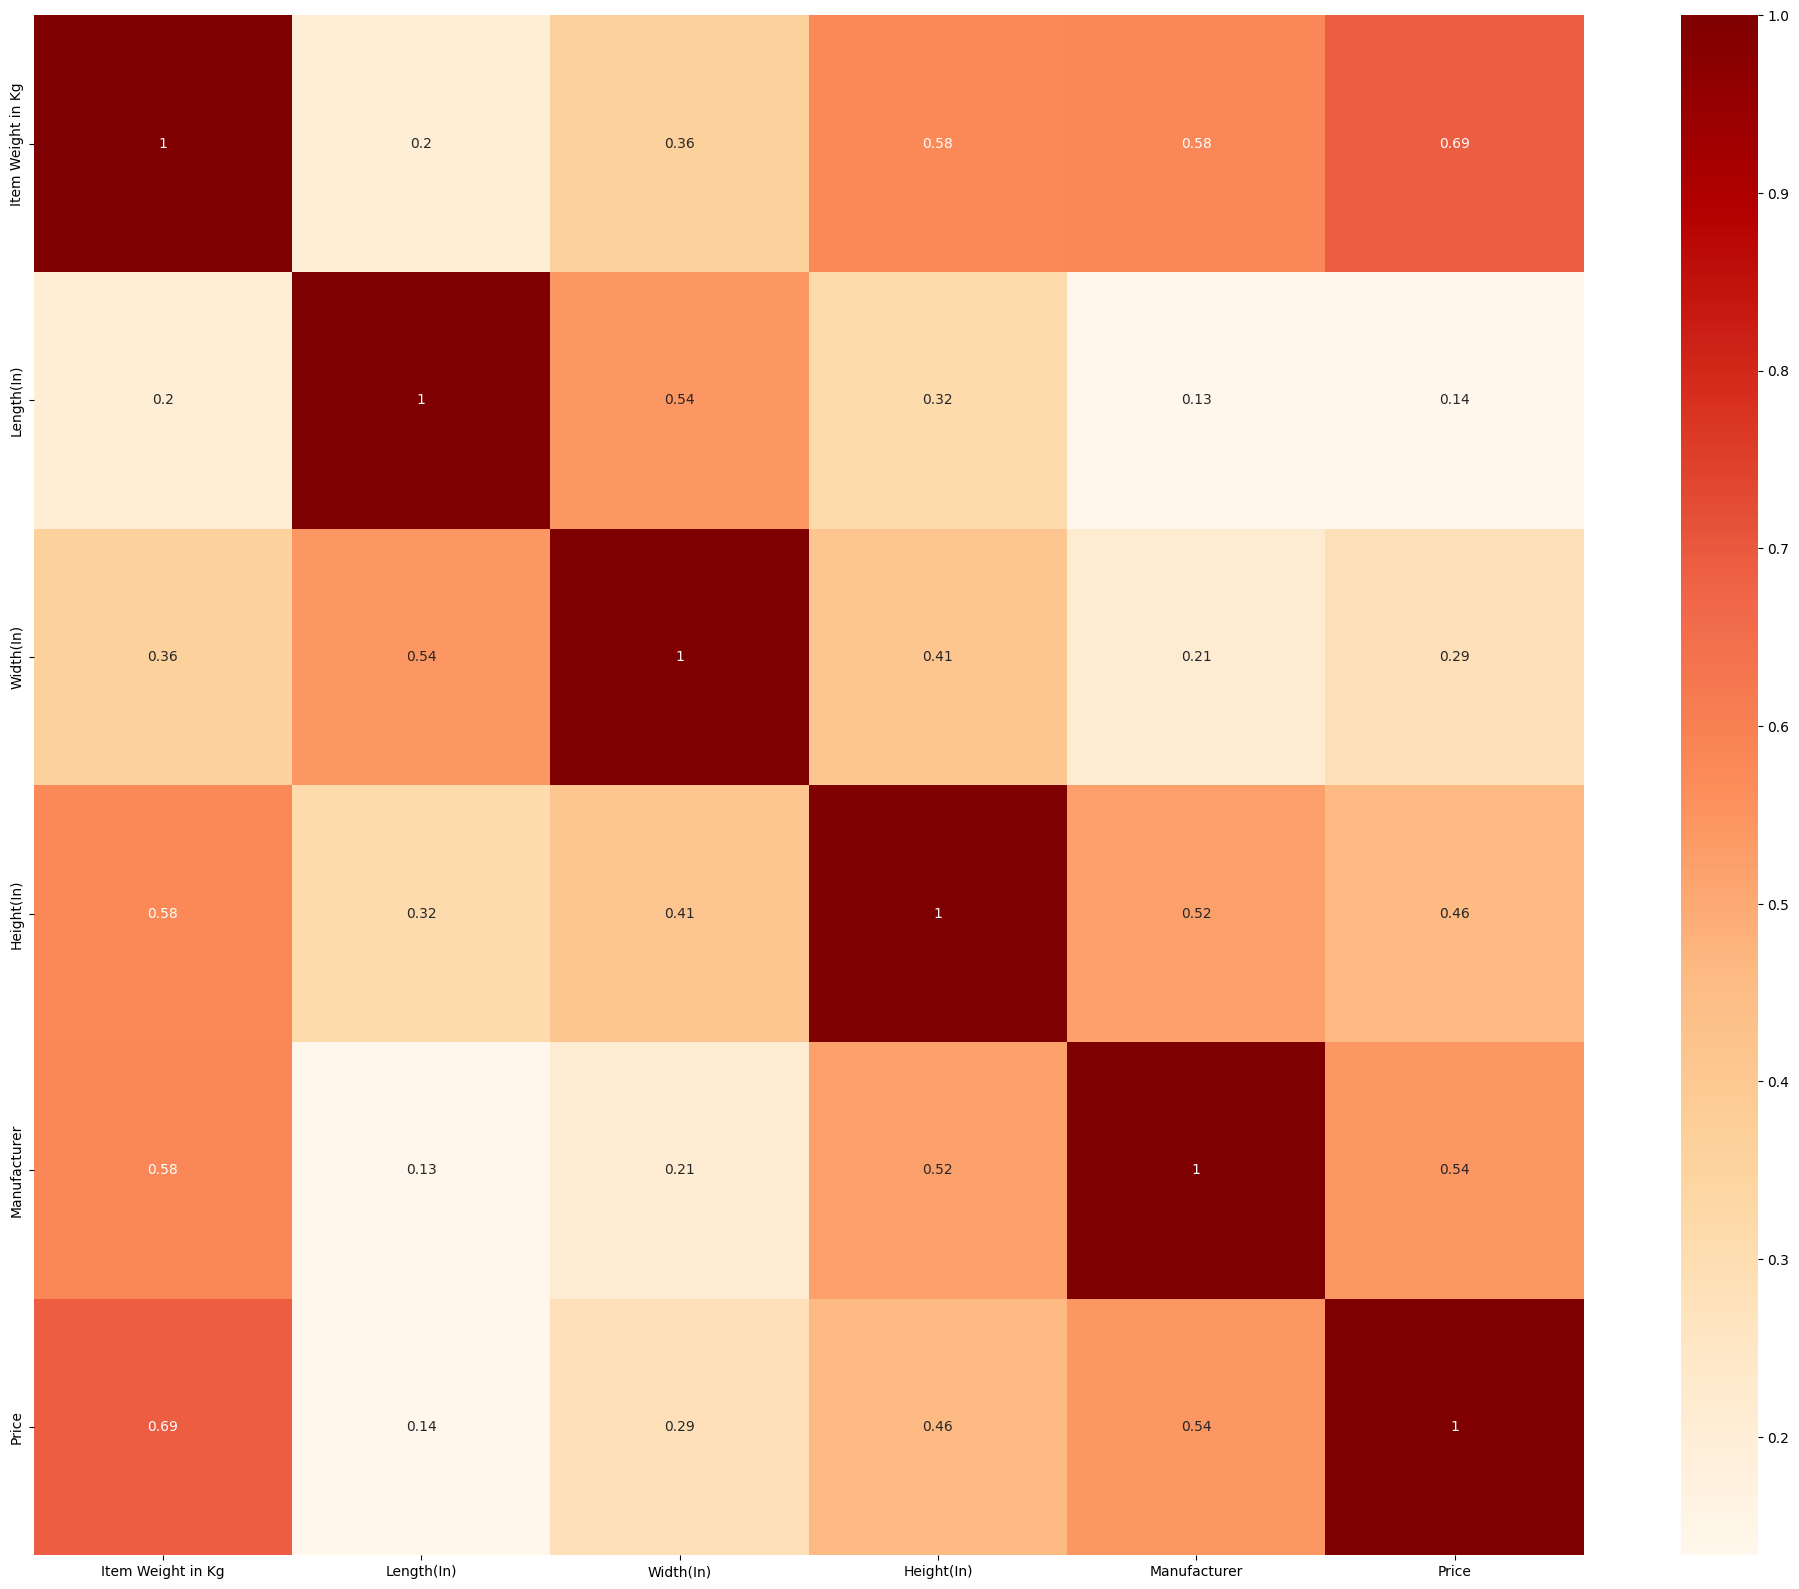

In [54]:
corr = df.corr()
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'OrRd')

/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/3327261988.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/3327261988.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/3327261988.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/3327261988.py:6: FutureWarning: 

`shade` is now deprecated in favor 

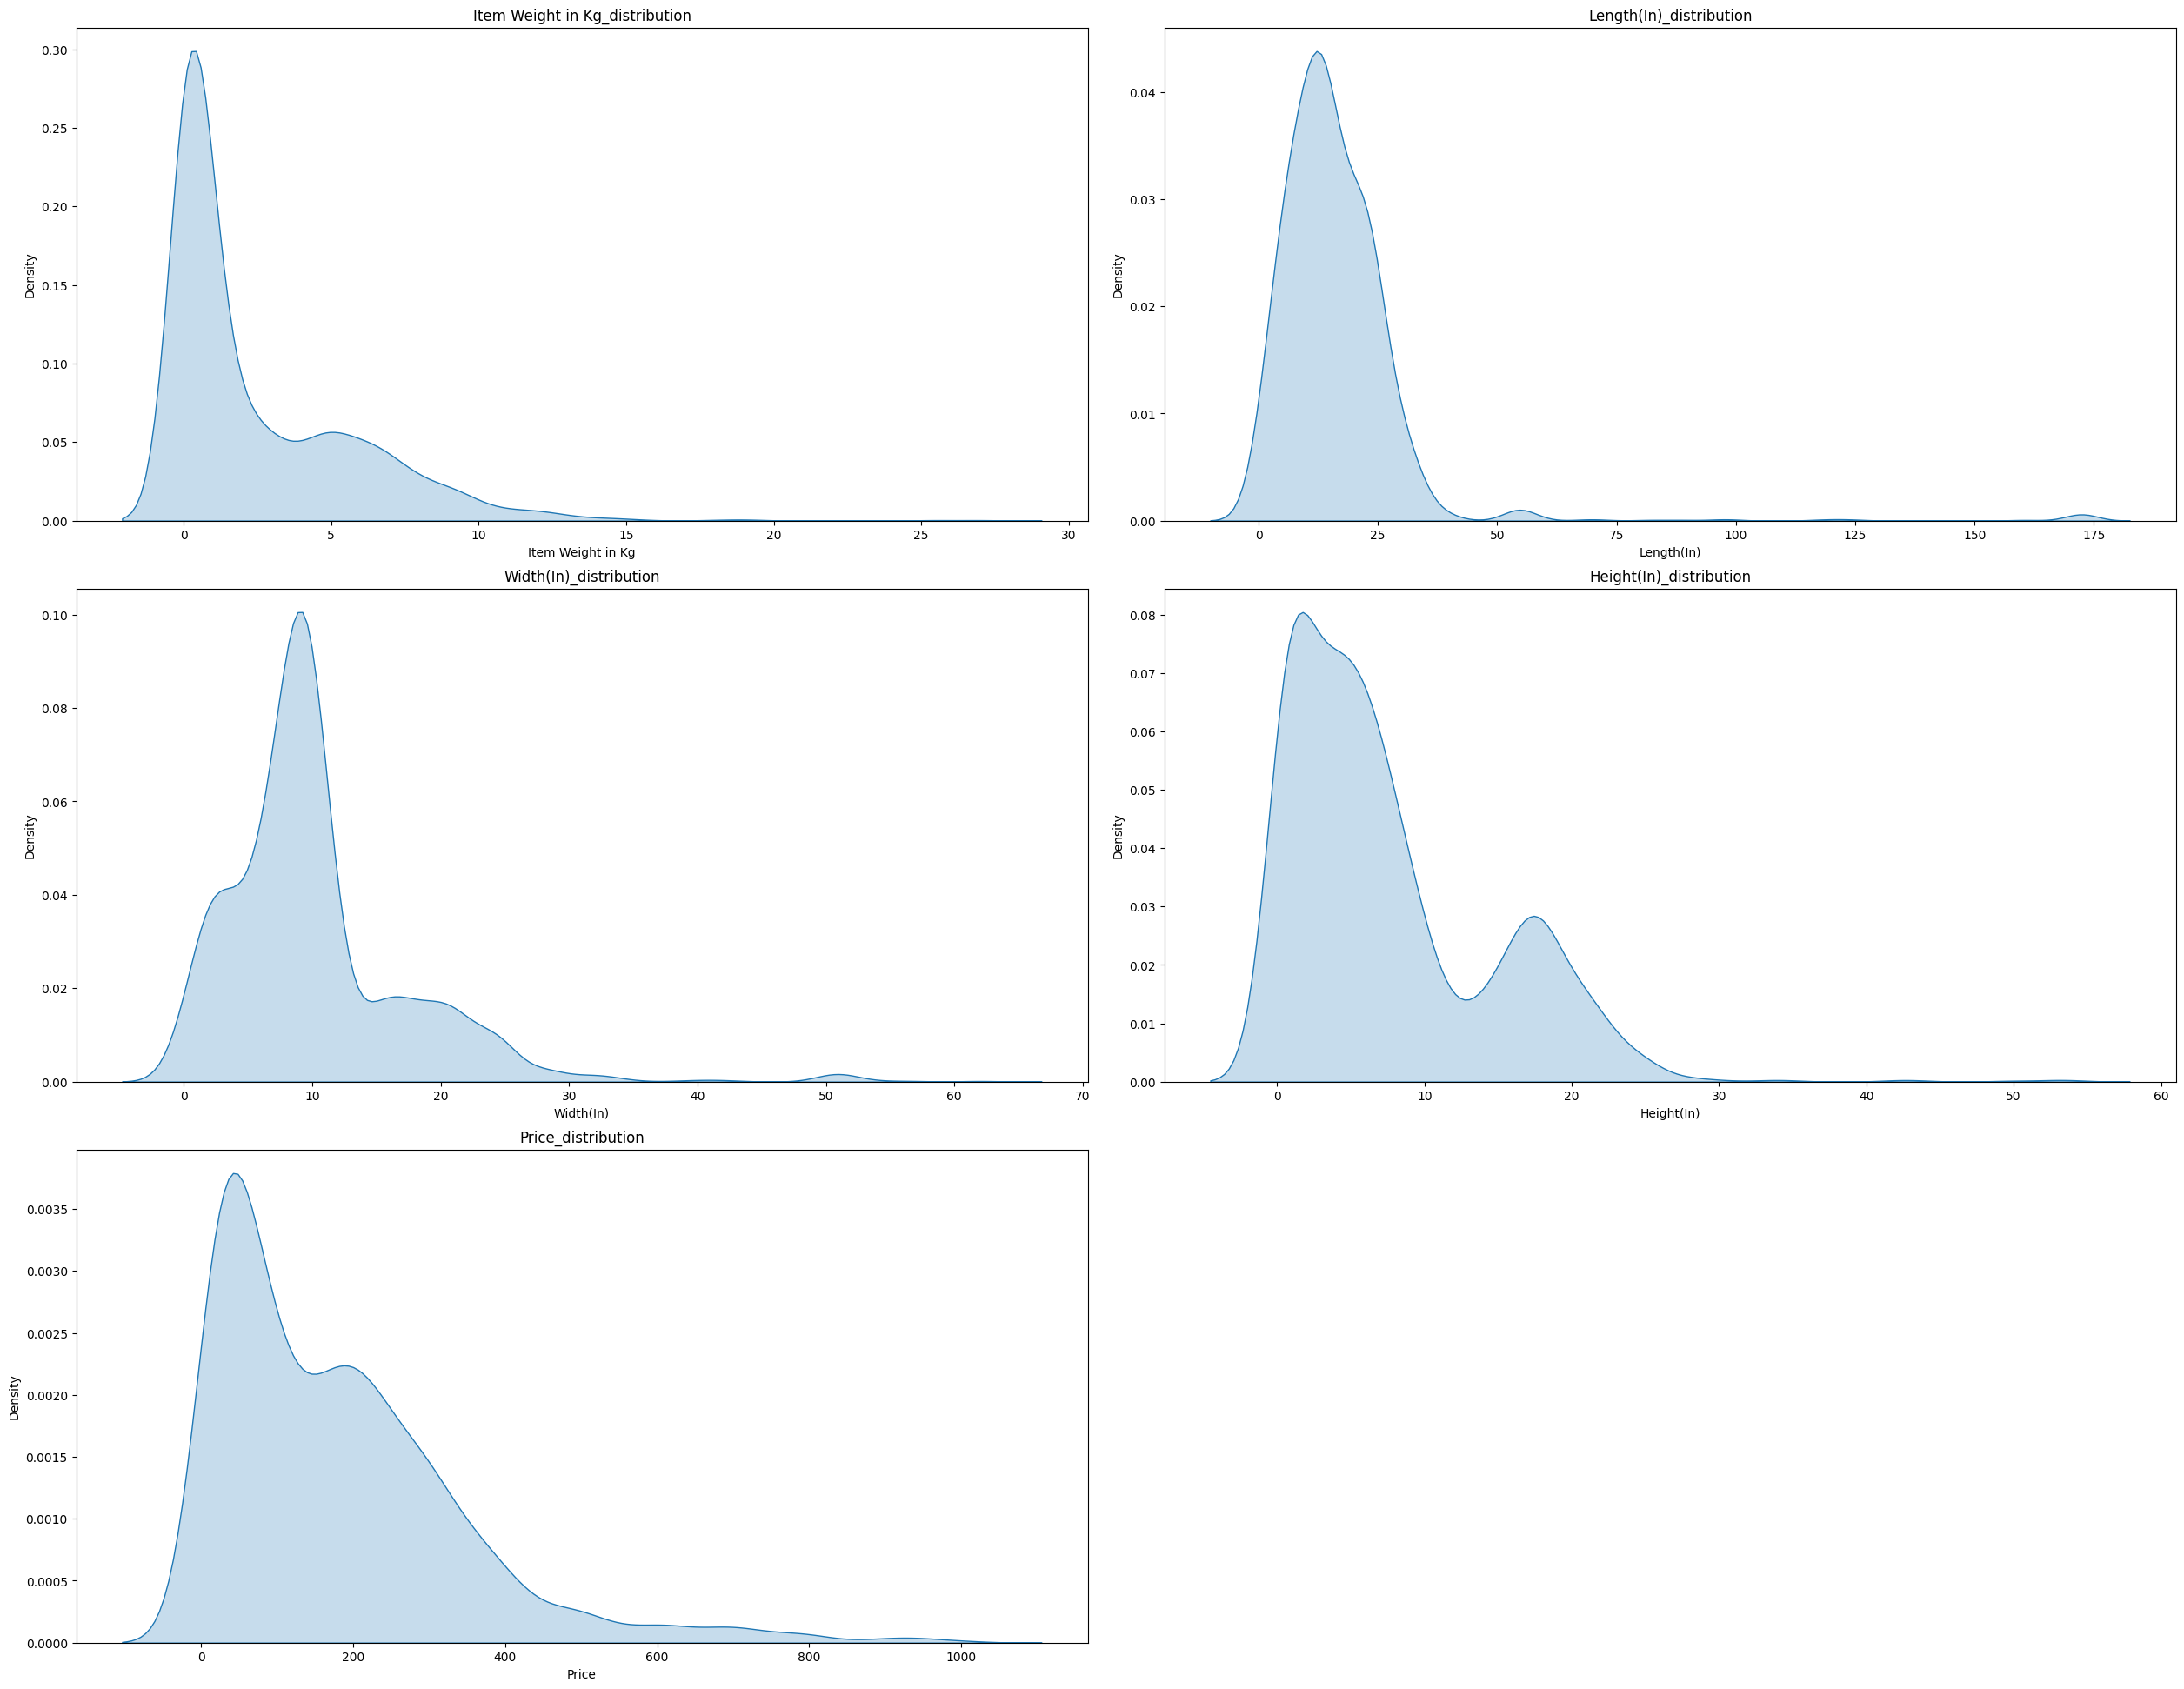

In [55]:
quantitative = ['Item Weight in Kg','Length(In)','Width(In)','Height(In)','Price']
# see distributions of numerical variables
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(quantitative)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df,x=quantitative[i],shade=True)
    plt.title(quantitative[i]+'_distribution')
plt.show()

In [56]:
numeric_feature = ['Item Weight in Kg', 'Length(In)', 'Width(In)', 'Height(In)']
for col in numeric_feature:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2219303895.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2219303895.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2219303895.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x=quantitative[i],shade=True)
/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/2219303895.py:5: FutureWarning: 

`shade` is now deprecated in favor 

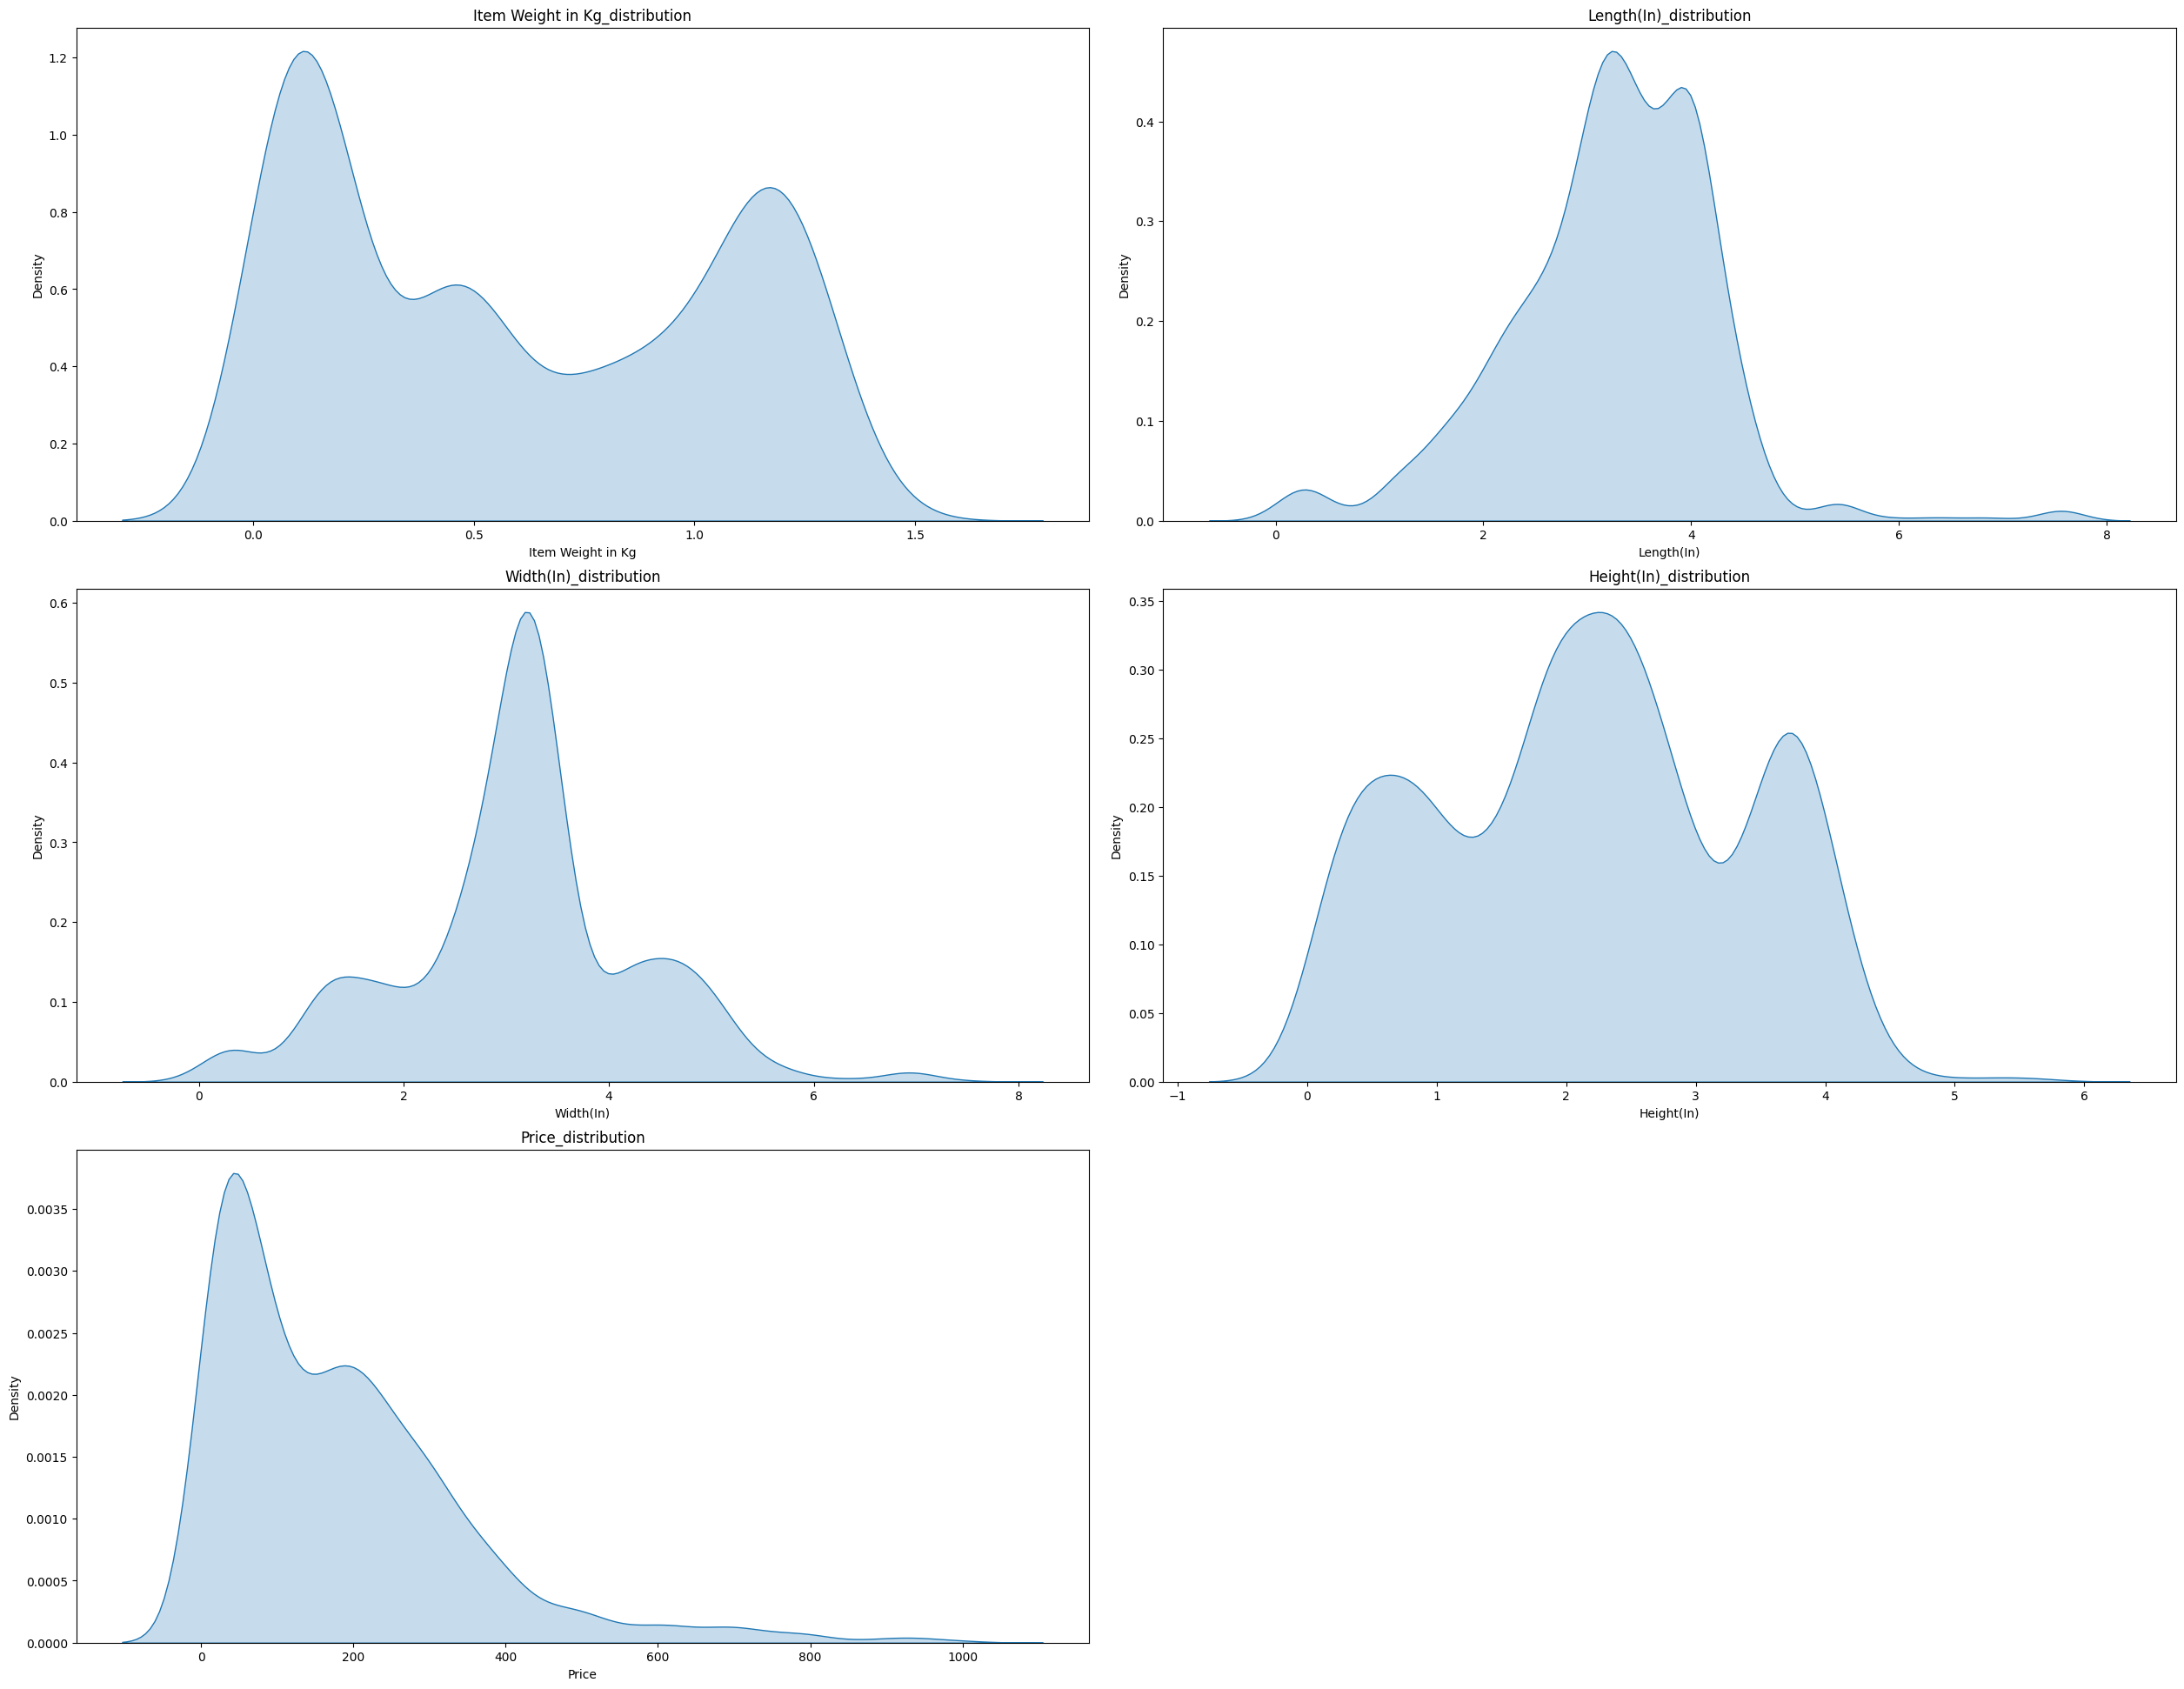

In [57]:
# see distributions of numerical variables
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(quantitative)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=df,x=quantitative[i],shade=True)
    plt.title(quantitative[i]+'_distribution')
plt.show()

Then make log transfromatinoon Price (target) to make it similar to normal distribution

In [58]:
df['Price'] = np.log(df['Price'])

/var/folders/cy/j205pskx0zx83x7sz14l4jhw0000gn/T/ipykernel_3596/4247227772.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='Price',shade=True)


<AxesSubplot: xlabel='Price', ylabel='Density'>

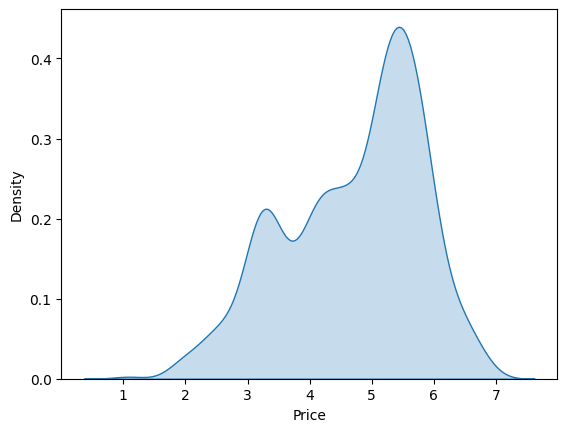

In [59]:
sns.kdeplot(data=df,x='Price',shade=True)

### Modeling

first split between training and testing set

In [60]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Since all the numerical variables are far from normal distribution, choose tree based model(LightGBM, XGBoost) to trarin them

In [61]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#### XGBOOST

In [62]:
reg_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42)

In [63]:
reg_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [64]:
mean_squared_error(y_test,reg_xgb.predict(X_test))

0.19100174970132747

In [65]:
reg_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42)

params_1 = {'learning_rate': [0.01, 0.03, 0.05], #so called `eta` value
              'max_depth': [3,5,6],
              'reg_lambda': [1, 0, 0.1],
               'gamma' :[1, 0.1, 0.01]
           }

In [66]:
grid_search1 =GridSearchCV(
    reg_xgb,
    params_1,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=10,
             param_grid={'gamma': [1, 0.1, 0.01],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'max_depth': [3, 5, 6], 'reg_lambda': [1, 0, 0.1]},
             verbose=1)

In [67]:
grid_search1.best_params_

{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 6, 'reg_lambda': 0}

In [68]:
params_2 = {'learning_rate': [ 0.05, 0.08 ,0.1], #so called `eta` value
              'max_depth': [6,7,8],
              'reg_lambda': [0,0.01, 0.03, 0.05],
               'gamma':[0.1, 0.8, 0.4],
           }

In [69]:
grid_search2 =GridSearchCV(
    reg_xgb,
    params_2,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=10,
             param_grid={'gamma': [0.1, 0.8, 0.4],
                         'learning_rate': [0.05, 0.08, 0.1],
                         'max_depth': [6, 7, 8],
                         'reg_lambda': [0, 0.01, 0.03, 0.05]},
             verbose=1)

In [70]:
grid_search2.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 0.05}

In [71]:
params_3 = {'learning_rate': [0.07,0.08,0.09, 0.1], #so called `eta` value
              'max_depth': [6],
              'reg_lambda': [0.05,0.06,0.08],
               'gamma':[0.1]
           }

In [72]:
grid_search3 =GridSearchCV(
    reg_xgb,
    params_3,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search3.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=10,
             param_grid={'gamma': [0.1],
                         'learning_rate': [0.07, 0.08, 0.09, 0.1],
                         'max_depth': [6], 'reg_lambda': [0.05, 0.06, 0.08]},
             verbose=1)

In [73]:
grid_search3.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'reg_lambda': 0.05}

In [74]:
reg_xgb_new = xgb.XGBRegressor(objective = 'reg:squarederror',
                              reg_lambda = 0.05,
                              max_depth = 6,
                              learning_rate = 0.1,
                              gamma = 0.1,
                              random_state = 42)
reg_xgb_new.fit(X_train, y_train,eval_set = [(X_test, y_test)],
                              early_stopping_rounds = 20,
                              eval_metric = 'rmse')

[0]	validation_0-rmse:3.89765
[1]	validation_0-rmse:3.51398
[2]	validation_0-rmse:3.16835
[3]	validation_0-rmse:2.85804
[4]	validation_0-rmse:2.58143
[5]	validation_0-rmse:2.33330
[6]	validation_0-rmse:2.11178
[7]	validation_0-rmse:1.91073
[8]	validation_0-rmse:1.73179
[9]	validation_0-rmse:1.57297
[10]	validation_0-rmse:1.43069
[11]	validation_0-rmse:1.30358


/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.19024
[13]	validation_0-rmse:1.09202
[14]	validation_0-rmse:1.00385
[15]	validation_0-rmse:0.92567
[16]	validation_0-rmse:0.85898
[17]	validation_0-rmse:0.79871
[18]	validation_0-rmse:0.74627
[19]	validation_0-rmse:0.70059
[20]	validation_0-rmse:0.65982
[21]	validation_0-rmse:0.62628
[22]	validation_0-rmse:0.59650
[23]	validation_0-rmse:0.57269
[24]	validation_0-rmse:0.55248
[25]	validation_0-rmse:0.53644
[26]	validation_0-rmse:0.52054
[27]	validation_0-rmse:0.50930
[28]	validation_0-rmse:0.49825
[29]	validation_0-rmse:0.48957
[30]	validation_0-rmse:0.48274
[31]	validation_0-rmse:0.47488
[32]	validation_0-rmse:0.46858
[33]	validation_0-rmse:0.46463
[34]	validation_0-rmse:0.46000
[35]	validation_0-rmse:0.45558
[36]	validation_0-rmse:0.45318
[37]	validation_0-rmse:0.45010
[38]	validation_0-rmse:0.44818
[39]	validation_0-rmse:0.44615
[40]	validation_0-rmse:0.44458
[41]	validation_0-rmse:0.44364
[42]	validation_0-rmse:0.44311
[43]	validation_0-rmse:0.44181
[44]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
print('Mean squared error score is:', mean_squared_error(y_test,reg_xgb_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_xgb_new.predict(X_test),y_test))

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

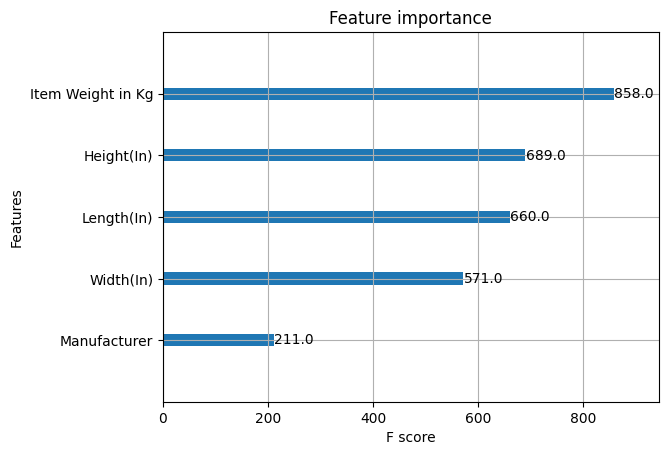

In [182]:
xgb.plot_importance(reg_xgb_new)

### Gradient Boosting Regressor

In [77]:
reg_gb = GradientBoostingRegressor(random_state = 42)

In [78]:
params_4 = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9],
    'max_leaf_nodes' : [10, 50, 100]
}

In [79]:
rand_search4 =RandomizedSearchCV(
    reg_gb,
    params_4,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
rand_search4.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'max_depth': [3, 7, 9],
                                        'max_leaf_nodes': [10, 50, 100],
                                        'n_estimators': [10, 50, 100, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   verbose=1)

In [80]:
rand_search4.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'max_leaf_nodes': 100,
 'max_depth': 7,
 'learning_rate': 0.01}

In [81]:
params_5 = {
    'n_estimators' : [300, 400, 500],
    'learning_rate' : [0.005 ,0.01,0.05],
    'subsample' : [0.3, 0.4, 0.5, 0.6],
    'max_depth' : [9,10,15,20,25],
    'max_leaf_nodes' : [50, 70 ,80, 100]
}

In [86]:
rand_search5 =RandomizedSearchCV(
    reg_gb,
    params_5,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
rand_search5.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05],
                                        'max_depth': [9, 10, 15, 20, 25],
                                        'max_leaf_nodes': [50, 70, 80, 100],
                                        'n_estimators': [300, 400, 500],
                                        'subsample': [0.3, 0.4, 0.5, 0.6]},
                   verbose=1)

Ran randomized search twice to see what is that range for each hyperparameters so that I can set the number s to twest for the next trial of search.

In [87]:
rand_search5.best_params_

{'subsample': 0.6,
 'n_estimators': 400,
 'max_leaf_nodes': 80,
 'max_depth': 9,
 'learning_rate': 0.01}

In [83]:
rand_search5.best_params_

{'subsample': 0.5,
 'n_estimators': 500,
 'max_leaf_nodes': 70,
 'max_depth': 15,
 'learning_rate': 0.05}

In [84]:
params_6 = {
    'n_estimators' : [350, 400, 450, 500],
    'learning_rate' : [0.01, 0.03, 0.05],
    'subsample' : [0.5, 0.6],
    'max_depth' : [18, 20, 23, 25],
    'max_leaf_nodes' : [65,70,75,80]
}

In [95]:
rand_search6 = RandomizedSearchCV(
    reg_gb,
    params_6,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
rand_search6.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [18, 20, 23, 25],
                                        'max_leaf_nodes': [65, 70, 75],
                                        'n_estimators': [350, 400, 450, 500],
                                        'subsample': [0.5, 0.6]},
                   verbose=1)

Here doing the same thing as above. This saves much more time as Grid search takes much more time compared to Randomized Search so that it takes much less time to run randomized search cv twice.

In [94]:
rand_search6.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'max_leaf_nodes': 65,
 'max_depth': 18,
 'learning_rate': 0.01}

In [96]:
rand_search6.best_params_

{'subsample': 0.5,
 'n_estimators': 500,
 'max_leaf_nodes': 75,
 'max_depth': 23,
 'learning_rate': 0.01}

In [97]:
params_7 = {
    'n_estimators' : [500],
    'learning_rate' : [0.01],
    'subsample' : [0.6, 0.5],
    'max_depth' : [18,20,23],
    'max_leaf_nodes' : [65,70,75]
}

In [98]:
grid_search7 = GridSearchCV(
    reg_gb,
    params_7,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search7.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=10,
             param_grid={'learning_rate': [0.01], 'max_depth': [18, 20, 23],
                         'max_leaf_nodes': [65, 70, 75], 'n_estimators': [500],
                         'subsample': [0.6, 0.5]},
             verbose=1)

In [99]:
grid_search7.best_params_

{'learning_rate': 0.01,
 'max_depth': 18,
 'max_leaf_nodes': 65,
 'n_estimators': 500,
 'subsample': 0.6}

In [101]:
reg_gb_new = GradientBoostingRegressor(random_state = 42,
                                      learning_rate = 0.01,
                                      max_depth = 18,
                                      max_leaf_nodes = 65,
                                      n_estimators = 500,
                                      subsample = 0.6)
reg_gb_new.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=18, max_leaf_nodes=65,
                          n_estimators=500, random_state=42, subsample=0.6)

In [107]:
print('Mean squared error score is:', mean_squared_error(y_test,reg_gb_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_gb_new.predict(X_test),y_test))

Mean squared error score is: 0.1708121715302357
RMSE score is :  0.413294291673906


### LightGBM

In [104]:
reg_lgbm = LGBMRegressor(objective = 'mean_squared_error', random_state =42)

In [183]:
params_8 = {
    'learning_rate': [0.1,0.01, 0.05],
    'num_leaves': [90,150,200],
    'boosting_type' : ['gbdt'],
    'max_depth' : [5,6,7,8],
    'min_split_gain' : [0.01, 0.1 ,0.05],
    'min_data_in_leaf':[10, 20, 30],
    }

In [184]:
grid_search8 =GridSearchCV(
    reg_lgbm,
    params_8,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search8.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='mean_squared_error',
                                     random_state=42),
             n_jobs=10,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [5, 6, 7, 8],
                         'min_data_in_leaf': [10, 20, 30],
                         'min_split_gain': [0.01, 0.1, 0.05],
                         'num_leaves': [90, 150, 200]},
             verbose=1)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

In [108]:
grid_search8.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_data_in_leaf': 20,
 'min_split_gain': 0.01,
 'num_leaves': 90}

In [109]:
params_9 = {
    'learning_rate': [0.1,0.5, 0.3],
    'num_leaves': [90,100,110],
    'boosting_type' : ['gbdt'],
    'max_depth' : [8, 9, 10, 11],
    'min_split_gain' : [0.01, 0.008, 0.03],
    'min_data_in_leaf':[10],
    }

In [110]:
grid_search9 =GridSearchCV(
    reg_lgbm,
    params_9,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search9.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignor

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min

GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='mean_squared_error',
                                     random_state=42),
             n_jobs=10,
             param_grid={'boosting_type': ['gbdt'],
                         'learning_rate': [0.1, 0.5, 0.3],
                         'max_depth': [8, 9, 10, 11], 'min_data_in_leaf': [10],
                         'min_split_gain': [0.01, 0.008, 0.03],
                         'num_leaves': [90, 100, 110]},
             verbose=1)

In [111]:
grid_search9.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_data_in_leaf': 10,
 'min_split_gain': 0.008,
 'num_leaves': 100}

In [112]:
reg_lgbm_new = LGBMRegressor(objective = 'mean_squared_error',
                             random_state =42,
                            num_leaves = 90,
                            min_split_gain = 0.01,
                            min_data_in_leaf = 10,
                            max_depth = 9,
                            learning_rate = 0.1, 
                            boosting_type = 'gbdt')
reg_lgbm_new.fit(X_train, y_train, 
                eval_set = [(X_test, y_test)],
                              early_stopping_rounds = 20,
                              eval_metric = 'rmse')

/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 0.984224	valid_0's l2: 0.968697
[2]	valid_0's rmse: 0.91203	valid_0's l2: 0.831798
[3]	valid_0's rmse: 0.847608	valid_0's l2: 0.718439
[4]	valid_0's rmse: 0.792042	valid_0's l2: 0.62733
[5]	valid_0's rmse: 0.745525	valid_0's l2: 0.555807
[6]	valid_0's rmse: 0.703255	valid_0's l2: 0.494568
[7]	valid_0's rmse: 0.666522	valid_0's l2: 0.444251
[8]	valid_0's rmse: 0.635696	valid_0's l2: 0.404109
[9]	valid_0's rmse: 0.609447	valid_0's l2: 0.371426
[10]	valid_0's rmse: 0.586662	valid_0's l2: 0.344172
[11]	valid_0's rmse: 0.568094	valid_0's l2: 0.32273
[12]	valid_0's rmse: 0.548717	valid_0's l2: 0.30109
[13]	valid_0's rmse: 0.534874	valid_0's l2: 0.28609
[14]	valid_0's rmse: 0.521342	valid_0's l2: 0.271797
[15]	valid_0's rmse: 0.510552	valid_0's l2: 0.260663
[16]	valid_0's rmse: 0.501169	valid_0's l2: 0.25117
[17]	valid_0's rmse: 0.494168	valid_0's l2: 0.244202
[18]	valid_0's rmse: 0.486077	valid_0's l2: 0.236271
[19]	valid_0's rmse: 0.480685	valid_0's l2: 0.231058
[20]	val

LGBMRegressor(max_depth=9, min_data_in_leaf=10, min_split_gain=0.01,
              num_leaves=90, objective='mean_squared_error', random_state=42)

In [170]:
print('Mean squared error score is:', mean_squared_error(y_test,reg_lgbm_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_lgbm_new.predict(X_test),y_test))

Mean squared error score is: 0.19487709993070676
RMSE score is :  0.441448864457376


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

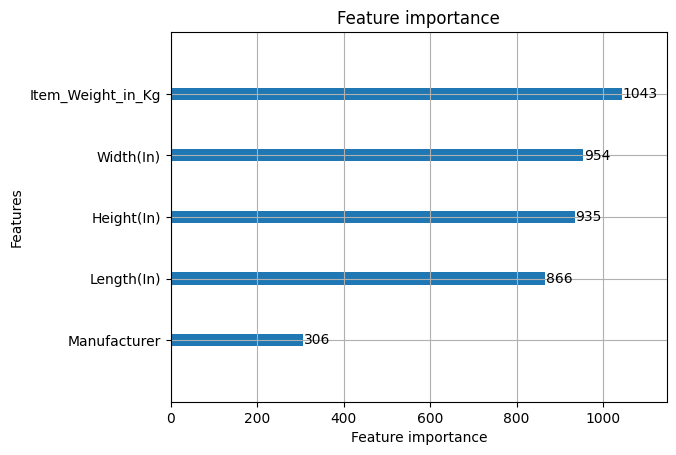

In [180]:
lightgbm.plot_importance(reg_lgbm_new)

Try LightGBM with L2 regulation

In [185]:
reg_lgbm_l2 = LGBMRegressor(objective = 'regression_l2', random_state =42)

In [186]:
params_10 = {
    'learning_rate': [0.1,0.01, 0.05],
    'num_leaves': [90,150,200],
    'boosting_type' : ['gbdt'],
    'max_depth' : [5,6,7,8],
    'min_split_gain' : [0.01, 0.1 ,0.05],
    'min_data_in_leaf':[10, 20, 30],
        'lambda_l2' : [0.1, 1, 10]
    }

In [190]:
rand_search10 =RandomizedSearchCV(
    reg_lgbm_l2,
    params_10,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
rand_search10.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(objective='regression_l2',
                                           random_state=42),
                   n_jobs=10,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'lambda_l2': [0.1, 1, 10],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10, 20, 30],
                                        'min_split_gain': [0.01, 0.1, 0.05],
                                        'num_leaves': [90, 150, 200]},
                   verbose=1)

In [189]:
rand_search10.best_params_

{'num_leaves': 90,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 10,
 'max_depth': 6,
 'learning_rate': 0.1,
 'lambda_l2': 1,
 'boosting_type': 'gbdt'}

In [191]:
rand_search10.best_params_

{'num_leaves': 150,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 20,
 'max_depth': 7,
 'learning_rate': 0.1,
 'lambda_l2': 0.1,
 'boosting_type': 'gbdt'}

In [192]:
params_11 = {
    'learning_rate': [0.1,0.3, 0.5, 0.095],
    'num_leaves': [90,100,120,150],
    'boosting_type' : ['gbdt'],
    'max_depth' : [6,7],
    'min_split_gain' : [0.01,0.03, 0.05, 0.08],
    'min_data_in_leaf':[10, 20, 15],
        'lambda_l2' : [0.1,0.3, 0.5, 0.095]
    }

In [196]:
rand_search11 =RandomizedSearchCV(
    reg_lgbm_l2,
    params_11,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
rand_search11.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(objective='regression_l2',
                                           random_state=42),
                   n_jobs=10,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'lambda_l2': [0.1, 0.3, 0.5, 0.095],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.095],
                                        'max_depth': [6, 7],
                                        'min_data_in_leaf': [10, 20, 15],
                                        'min_split_gain': [0.01, 0.03, 0.05,
                                                           0.08],
                                        'num_leaves': [90, 100, 120, 150]},
                   verbose=1)

In [197]:
rand_search11.best_params_

{'num_leaves': 120,
 'min_split_gain': 0.01,
 'min_data_in_leaf': 15,
 'max_depth': 7,
 'learning_rate': 0.3,
 'lambda_l2': 0.095,
 'boosting_type': 'gbdt'}

In [195]:
rand_search11.best_params_

{'num_leaves': 150,
 'min_split_gain': 0.05,
 'min_data_in_leaf': 10,
 'max_depth': 7,
 'learning_rate': 0.3,
 'lambda_l2': 0.095,
 'boosting_type': 'gbdt'}

In [201]:
params_12 = {
    'learning_rate': [0.3],
    'num_leaves': [120,130, 140,150],
    'boosting_type' : ['gbdt'],
    'max_depth' : [7],
    'min_split_gain' : [0.01,0.03, 0.05],
    'min_data_in_leaf':[10, 20, 15],
        'lambda_l2' : [0.095, 0.085, 0.075]
    }

In [202]:
grid_search12 =GridSearchCV(
    reg_lgbm_l2,
    params_12,
    n_jobs = 10,
    cv = 5,
    verbose=1,
)
grid_search12.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=LGBMRegressor(objective='regression_l2',
                                     random_state=42),
             n_jobs=10,
             param_grid={'boosting_type': ['gbdt'],
                         'lambda_l2': [0.095, 0.085, 0.075],
                         'learning_rate': [0.3], 'max_depth': [7],
                         'min_data_in_leaf': [10, 20, 15],
                         'min_split_gain': [0.01, 0.03, 0.05],
                         'num_leaves': [120, 130, 140, 150]},
             verbose=1)

In [203]:
grid_search12.best_params_

{'boosting_type': 'gbdt',
 'lambda_l2': 0.095,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 120}

In [204]:
reg_lgbm_l2_new = LGBMRegressor(objective = 'regression_l2',
                                random_state =42,
                               boosting_type = 'gbdt',
                               lambda_l2 = 0.095,
                               learning_rate = 0.3,
                               max_depth = 7,
                               min_data_in_leaf  = 10,
                               min_split_gain = 0.01,
                               num_leaves = 120)

reg_lgbm_l2_new.fit(X_train, y_train, 
                eval_set = [(X_test, y_test)],
                              early_stopping_rounds = 20,
                              eval_metric = 'rmse')

/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's rmse: 0.840971	valid_0's l2: 0.707233
[2]	valid_0's rmse: 0.702752	valid_0's l2: 0.49386
[3]	valid_0's rmse: 0.608085	valid_0's l2: 0.369768
[4]	valid_0's rmse: 0.555012	valid_0's l2: 0.308038
[5]	valid_0's rmse: 0.515803	valid_0's l2: 0.266052
[6]	valid_0's rmse: 0.493978	valid_0's l2: 0.244014
[7]	valid_0's rmse: 0.48196	valid_0's l2: 0.232285
[8]	valid_0's rmse: 0.476373	valid_0's l2: 0.226931
[9]	valid_0's rmse: 0.470729	valid_0's l2: 0.221586
[10]	valid_0's rmse: 0.466773	valid_0's l2: 0.217877
[11]	valid_0's rmse: 0.46115	valid_0's l2: 0.212659
[12]	valid_0's rmse: 0.460557	valid_0's l2: 0.212113
[13]	valid_0's rmse: 0.455737	valid_0's l2: 0.207697
[14]	valid_0's rmse: 0.453465	valid_0's l2: 0.205631
[15]	valid_0's rmse: 0.451762	valid_0's l2: 0.204089
[16]	valid_0's rmse: 0.452283	valid_0's l2: 0.20456
[17]	valid_0's rmse: 0.449312	valid_0's l2: 0.201881
[18]	valid_0's rmse: 0.447449	valid_0's l2: 0.200211
[19]	valid_0's rmse: 0.447806	valid_0's l2: 0.20053
[20]	va

LGBMRegressor(lambda_l2=0.095, learning_rate=0.3, max_depth=7,
              min_data_in_leaf=10, min_split_gain=0.01, num_leaves=120,
              objective='regression_l2', random_state=42)

In [205]:
print('Mean squared error score is:', mean_squared_error(y_test,reg_lgbm_l2_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_lgbm_l2_new.predict(X_test),y_test))

Mean squared error score is: 0.19504646306248857
RMSE score is :  0.44164064924153956


### Stacked Model

In [206]:
stacked_model = StackingCVRegressor(regressors=( reg_xgb_new, reg_lgbm_new, reg_gb_new, reg_lgbm_l2_new),
                                    meta_regressor = reg_xgb_new, use_features_in_secondary=True)

In [207]:
stacked_model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.095
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.1,
                                                gpu_id=None, grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=...
                                              objective='mean_squared_error',
                                              random_state=42),
                                GradientBoostingRegressor(learning_rate=0.01,
                                                          max_depth=18,
                                                          max_leaf_nodes=65,
                                                          n_estimators=500,
                                                          random_state=42,
                                                          subsample=0.6),
                                LGBMRegressor(lambda_l2=0.095,
                                              learning_rate=0.3, max_depth=7,
                                              min_data_in_leaf=10,
                                              min_split_gain=0.01,
                                              num_leaves=120,
                                              objective='regression_l2',
                                              random_state=42)),
                    use_features_in_secondary=True)

In [208]:
print('Mean squared error score is:', mean_squared_error(y_test,stacked_model.predict(X_test)))
print('RMSE score is : ', rmse(stacked_model.predict(X_test),y_test))

Mean squared error score is: 0.20161805796306217
RMSE score is :  0.44901899510272636


/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: 

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: mi

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: mi

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current val

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current val

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_da

Below is list of MSE and RMSE scores of each models

In [209]:
print('XGBoost')
print('Mean squared error score is:', mean_squared_error(y_test,reg_xgb_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_xgb_new.predict(X_test),y_test))
print('')
print('_____________________________________________________________________________')
print('Gradient Boosting')
print('Mean squared error score is:', mean_squared_error(y_test,reg_gb_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_gb_new.predict(X_test),y_test))
print('')
print('_____________________________________________________________________________')
print('LightGBM')
print('Mean squared error score is:', mean_squared_error(y_test,reg_lgbm_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_lgbm_new.predict(X_test),y_test))
print('')
print('_____________________________________________________________________________')
print('LightGBM with L2 regularization')
print('Mean squared error score is:', mean_squared_error(y_test,reg_lgbm_l2_new.predict(X_test)))
print('RMSE score is : ', rmse(reg_lgbm_l2_new.predict(X_test),y_test))
print('')
print('_____________________________________________________________________________')
print('Stacking regressor')
print('Mean squared error score is:', mean_squared_error(y_test,stacked_model.predict(X_test)))
print('RMSE score is : ', rmse(stacked_model.predict(X_test),y_test))
print('')
print('_____________________________________________________________________________')

XGBoost
Mean squared error score is: 0.18817656387546947
RMSE score is :  0.4337932270972767

_____________________________________________________________________________
Gradient Boosting
Mean squared error score is: 0.1708121715302357
RMSE score is :  0.413294291673906

_____________________________________________________________________________
LightGBM
Mean squared error score is: 0.19487709993070676
RMSE score is :  0.441448864457376

_____________________________________________________________________________
LightGBM with L2 regularization
Mean squared error score is: 0.19504646306248857
RMSE score is :  0.44164064924153956

_____________________________________________________________________________
Stacking regressor
Mean squared error score is: 0.20161805796306217
RMSE score is :  0.44901899510272636

_____________________________________________________________________________


/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/Users/wootaekkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
